In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#Normalize Constants
G = 6.674e-11 # Nm2/kg2
M_Earth = 5.972e24 # kg
R_Earth = 6.371e6 # m
g = G*M_Earth/(R_Earth**2) #9.81 m/s2


class Vector_Kinematics:
    def __init__(self, x, y, z, v, a):
        self.x = x
        self.y = y
        self.z = z
        self.v = v
        self.a = a
#Instanciate Equations of State
        self.position = np.array([self.x, self.y, self.z])
        self.position_bar = np.sqrt(self.x**2 + self.y**2 + self.z**2)
        self.velocity = self.position * (self.v/self.position_bar)
        self.acceleration = self.a * (self.position/self.position_bar)

#Define State Methods as (Vector, Magnitude)
    def Position(self):
        return self.position, self.position_bar
    def Velocity(self):
        return self.velocity, self.v
    def Acceleration(self):
        return self.acceleration, self.a
    
#Parameterize States for Plotting
    def Parameterization(self,t):
        t = np.linspace(0,t)
        self.t = t
        self.x = self.velocity[0]*self.t + .5*self.acceleration[0]*t**2
        self.y = self.velocity[1]*self.t + .5*self.acceleration[1]*t**2
        self.z = self.velocity[2]*self.t + .5*self.acceleration[2]*t**2
        self.v = self.v + self.a*self.t

        plot = plt.figure()
        axes = plot.add_subplot(111, projection = '3d')
        axes.plot(self.x, self.y, self.z, label = 'Change in Position')
        plt.show()


class Newtonian_Gravity:
    def __init__(self, m):
        self.m = m
#Instanciate Equations of State
        self.earths = g*self.m
        self.gforce_normalized = G*self.m

#Define Methods of States
    def Earth_Gravitational(self):
        return self.earths
    def Gravitational(self,M,R):
        self.R = R
        self.M = M
        return self.gforce_normalized * (self.M/(self.R**2))
    
#Parameterize States for Iterative Simulation
    def Parameterization(self,t, M, R):
        self.M = M
        self.R = R
        self.dt = 0.1
        self.t = np.linspace(0,t,t)

        self.acc = G*self.M/(self.R**2)
        self.distance = np.sqrt((self.R**2)/3)
        self.Kinematics = Vector_Kinematics(self.distance, self.distance, self.distance, 0, self.acc)
        self.coords = self.Kinematics.Position()[0]
        self.vel = self.Kinematics.Velocity()[0]

        self.acceleration_vector = np.array([-np.sqrt((self.acc**2)/3), -np.sqrt((self.acc**2)/3), -np.sqrt((self.acc**2)/3)])  # Assuming gravity acts in the negative z-direction
        #self.vel = self.vel + np.array([acceleration_vector[0]*self.dt, acceleration_vector[1]*self.dt, acceleration_vector[2]*self.dt])
        #self.coords = self.coords + self.vel*self.dt + 0.5*acceleration_vector*(self.dt**2)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        ax.set_xlim(0, 1e11)
        ax.set_ylim(0, 1e11)
        ax.set_zlim(0, 1e11)
        for t in self.t:
            self.vel = self.acceleration_vector * t
            self.coords = self.vel * t + 0.5 * self.acceleration_vector * (t**2)
            ax.scatter(self.coords[0], self.coords[1], self.coords[2], color = 'b')
            plt.pause(0.1)
        plt.show()

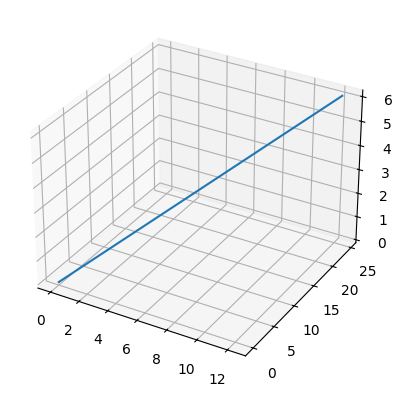

In [ ]:
position_over_time = Vector_Kinematics(2,4,1,0,.25).Parameterization(15)
position_over_time

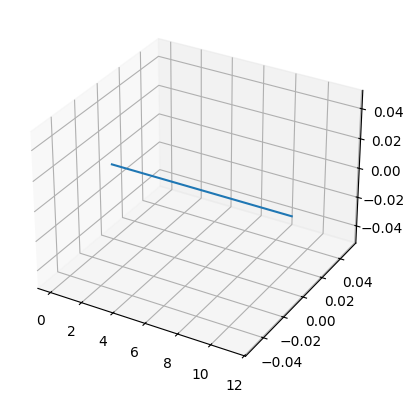

In [ ]:
again = Vector_Kinematics(1,0,0,0,.1).Parameterization(15)
again

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#Normalize Constants
G = 6.674e-11 # Nm2/kg2
M_Earth = 5.972e24 # kg
R_Earth = 6.371e6 # m
g = G*M_Earth/(R_Earth**2) #9.81 m/s2


class Vector_Kinematics:
    def __init__(self, x, y, z, v, a):
        self.x = x
        self.y = y
        self.z = z
        self.v = v
        self.a = a
#Instanciate Equations of State
        self.position = np.array([self.x, self.y, self.z])
        self.position_bar = np.sqrt(self.x**2 + self.y**2 + self.z**2)
        self.velocity = self.position * (self.v/self.position_bar)
        self.acceleration = self.a * (self.position/self.position_bar)

#Define State Methods as (Vector, Magnitude)
    def Position(self):
        return self.position, self.position_bar
    def Velocity(self):
        return self.velocity, self.v
    def Acceleration(self):
        return self.acceleration, self.a
    
#Parameterize States for Plotting
    def Parameterization(self,t):
        t = np.linspace(0,t)
        self.t = t
        self.x = self.velocity[0]*self.t + .5*self.acceleration[0]*t**2
        self.y = self.velocity[1]*self.t + .5*self.acceleration[1]*t**2
        self.z = self.velocity[2]*self.t + .5*self.acceleration[2]*t**2
        self.v = self.v + self.a*self.t

        plot = plt.figure()
        axes = plot.add_subplot(111, projection = '3d')
        axes.plot(self.x, self.y, self.z, label = 'Change in Position')
        plt.show()


class Newtonian_Gravity:
    def __init__(self, m):
        self.m = m
#Instanciate Equations of State
        self.earths = g*self.m
        self.gforce_normalized = G*self.m

#Define Methods of States
    def Earth_Gravitational(self):
        return self.earths
    def Gravitational(self,M,R):
        self.R = R
        self.M = M
        return self.gforce_normalized * (self.M/(self.R**2))
    
#Parameterize States for Iterative Simulation
    def Parameterization(self,t, M, R):
        self.M = M
        self.R = R
        self.dt = 0.1
        self.t = np.linspace(0,t,t)

        self.acc = G*self.M/(self.R**2)
        self.distance = np.sqrt((self.R**2)/3)
        self.Kinematics = Vector_Kinematics(self.distance, self.distance, self.distance, 0, self.acc)
        self.coords = self.Kinematics.Position()[0]
        self.vel = self.Kinematics.Velocity()[0]

        self.acceleration_vector = np.array([-np.sqrt((self.acc**2)/3), -np.sqrt((self.acc**2)/3), -np.sqrt((self.acc**2)/3)])  # Assuming gravity acts in the negative z-direction
        self.vel = self.vel + np.array([self.acceleration_vector[0]*self.dt, self.acceleration_vector[1]*self.dt, self.acceleration_vector[2]*self.dt])
        self.coords = self.coords + self.vel*self.dt + 0.5*self.acceleration_vector*(self.dt**2)

        plot = plt.figure()
        axes = plot.add_subplot(111, projection = '3d')
        axes.plot(self.coords[0], self.coords[1], self.coords[2], label = 'Change in Position')
        plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#Normalize Constants
G = 6.674e-11 # Nm2/kg2
M_Earth = 5.972e24 # kg
R_Earth = 6.371e6 # m
g = G*M_Earth/(R_Earth**2) #9.81 m/s2


class Vector_Kinematics:
    def __init__(self, x, y, z, v, a):
        self.x = x
        self.y = y
        self.z = z
        self.v = v
        self.a = a
#Instanciate Equations of State
        self.position = np.array([self.x, self.y, self.z])
        self.position_bar = np.sqrt(self.x**2 + self.y**2 + self.z**2)
        self.velocity = self.position * (self.v/self.position_bar)
        self.acceleration = self.a * (self.position/self.position_bar)

#Define State Methods as (Vector, Magnitude)
    def Position(self):
        return self.position, self.position_bar
    def Velocity(self):
        return self.velocity, self.v
    def Acceleration(self):
        return self.acceleration, self.a
    
#Parameterize States for Plotting
    def Parameterization(self,t):
        t = np.linspace(0,t)
        self.t = t
        self.x = self.velocity[0]*self.t + .5*self.acceleration[0]*t**2
        self.y = self.velocity[1]*self.t + .5*self.acceleration[1]*t**2
        self.z = self.velocity[2]*self.t + .5*self.acceleration[2]*t**2
        self.v = self.v + self.a*self.t

        plot = plt.figure()
        axes = plot.add_subplot(111, projection = '3d')
        axes.plot(self.x, self.y, self.z, label = 'Change in Position')
        plt.show()


class Newtonian_Gravity:
    def __init__(self, m):
        self.m = m
#Instanciate Equations of State
        self.earths = g*self.m
        self.gforce_normalized = G*self.m

#Define Methods of States
    def Earth_Gravitational(self):
        return self.earths
    def Gravitational(self,M,R):
        self.R = R
        self.M = M
        return self.gforce_normalized * (self.M/(self.R**2))
    
#Parameterize States for Iterative Simulation
    def Parameterization(self,t, M, R):
        self.M = M
        self.R = R
        self.dt = 0.1
        self.t = np.linspace(0,t,t)

        self.acc = G*self.M/(self.R**2)
        self.distance = np.sqrt((self.R**2)/3)
        self.Kinematics = Vector_Kinematics(self.distance, self.distance, self.distance, 0, self.acc)
        self.coords = self.Kinematics.Position()[0]
        self.vel = self.Kinematics.Velocity()[0]

        self.acceleration_vector = np.array([-np.sqrt((self.acc**2)/3), -np.sqrt((self.acc**2)/3), -np.sqrt((self.acc**2)/3)])  # Assuming gravity acts in the negative z-direction
        self.vel = self.vel + np.array([self.acceleration_vector[0]*self.dt, self.acceleration_vector[1]*self.dt, self.acceleration_vector[2]*self.dt])
        self.coords = self.coords + self.vel*self.dt + 0.5*self.acceleration_vector*(self.dt**2)

        return self.coords, self.vel

In [ ]:
gravity = Newtonian_Gravity(11000).Parameterization(1,M_Earth,R_Earth)
gravity2 = Newtonian_Gravity(11000).Parameterization(30,M_Earth,R_Earth)
gravity

(array([3678298.47996746, 3678298.47996746, 3678298.47996746]),
 array([-0.56693095, -0.56693095, -0.56693095]))

In [ ]:
#after 30 seconds, a planet about the same size as earth an earths distance away will be almost motionless.